In [21]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [53]:
# Load and preprocess data
df = pd.read_csv('/content/EU_to_US_Shoe_Size_Conversion.csv')
df.head()

,sex,height,shoe_size
0,woman,5.2,9.0
1,woman,5.6,8.0
2,woman,5.7,8.0
3,woman,5.8,9.0
4,man,6.4,13.0


In [54]:
# Drop rows with NA values
df.dropna(inplace=True)

# Drop columns with NA values
df.dropna(axis=1, inplace=True)

In [55]:
df

,sex,height,shoe_size
0,woman,5.2,9.0
1,woman,5.6,8.0
2,woman,5.7,8.0
3,woman,5.8,9.0
4,man,6.4,13.0
...,...,...,...
207,woman,5.4,7.0
208,woman,5.7,7.0
209,woman,5.6,6.0
210,woman,5.5,7.0


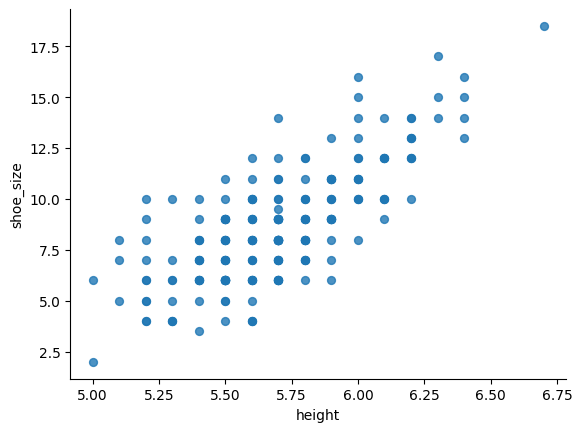

In [40]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='height', y='shoe_size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

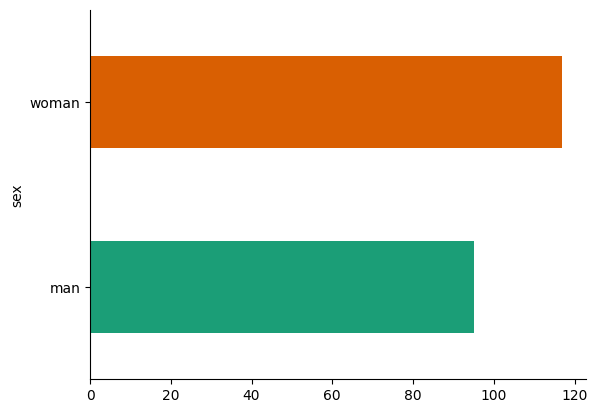

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

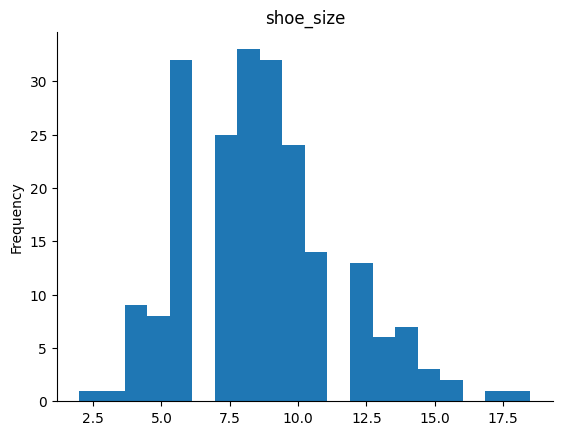

In [42]:
from matplotlib import pyplot as plt
df['shoe_size'].plot(kind='hist', bins=20, title='shoe_size')
plt.gca().spines[['top', 'right',]].set_visible(False)

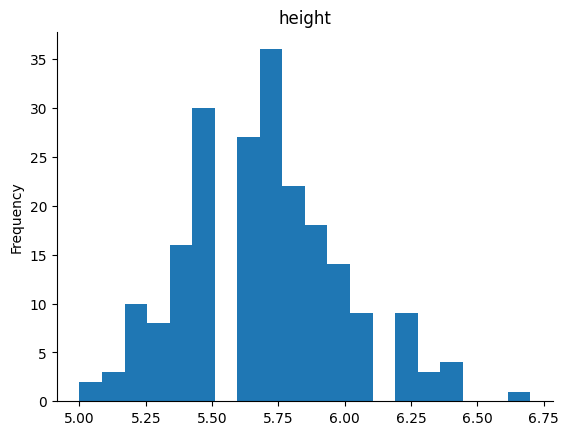

In [43]:
from matplotlib import pyplot as plt
df['height'].plot(kind='hist', bins=20, title='height')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [56]:
# Drop rows with missing values
df = df.dropna()

print(df['sex'].unique())
# First, convert sex to binary values
df['sex'] = df['sex'].map({'woman': 0, 'man': 1})

# Now apply normalized shoe size based on sex
df['normalized_shoe_size'] = df.apply(
    lambda row: row['shoe_size'] - 1.5 if row['sex'] == 0 else row['shoe_size'], axis=1
)

X = df[['height', 'normalized_shoe_size']]
y = df['sex']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

['woman' 'man']
Model Accuracy: 0.9069767441860465

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        22
           1       1.00      0.81      0.89        21

    accuracy                           0.91        43
   macro avg       0.92      0.90      0.91        43
weighted avg       0.92      0.91      0.91        43



In [57]:
import pickle

# Save the model
with open('naive_bayes_gender_model.pkl', 'wb') as file:
    pickle.dump(model, file)